In [11]:

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from plotnine import *
from sklearn.model_selection import GridSearchCV
ames = pd.read_csv("/Users/ethanschultz/Downloads/AmesHousing.csv")
good_cols = ames.isna().sum() < 100
ames = ames.loc[:,good_cols]
ames = ames.dropna()

In [12]:
X = ames.drop(["SalePrice", "Order", "PID"], axis = 1)
y = ames["SalePrice"]

ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

ridge_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("ridge_regression", Ridge(alpha=1.0))
    ]
)

linreg_cv_scores = cross_val_score(lr_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
ridge_cv_scores = cross_val_score(ridge_pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

print("Ridge Regression MSE:", -ridge_cv_scores.mean())
print("Linear Regression MSE:", -linreg_cv_scores.mean())

Ridge Regression MSE: 878606253.136419
Linear Regression MSE: 5.910012177637989e+31
Ridge Regression MSE: 878606253.136419
Linear Regression MSE: 5.910012177637989e+31


In [13]:

ridge_pipeline.fit(X, y)
lr_pipeline.fit(X, y)

ridge_coeff = ridge_pipeline.named_steps["ridge_regression"].coef_
linreg_coeff = lr_pipeline.named_steps["linear_regression"].coef_

all_feature_names = ct.get_feature_names_out()

df = pd.DataFrame({
    "Model": all_feature_names,
    "Ridge": ridge_coeff,
    "los": linreg_coeff
})

<positron-console-cell-16>:12: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


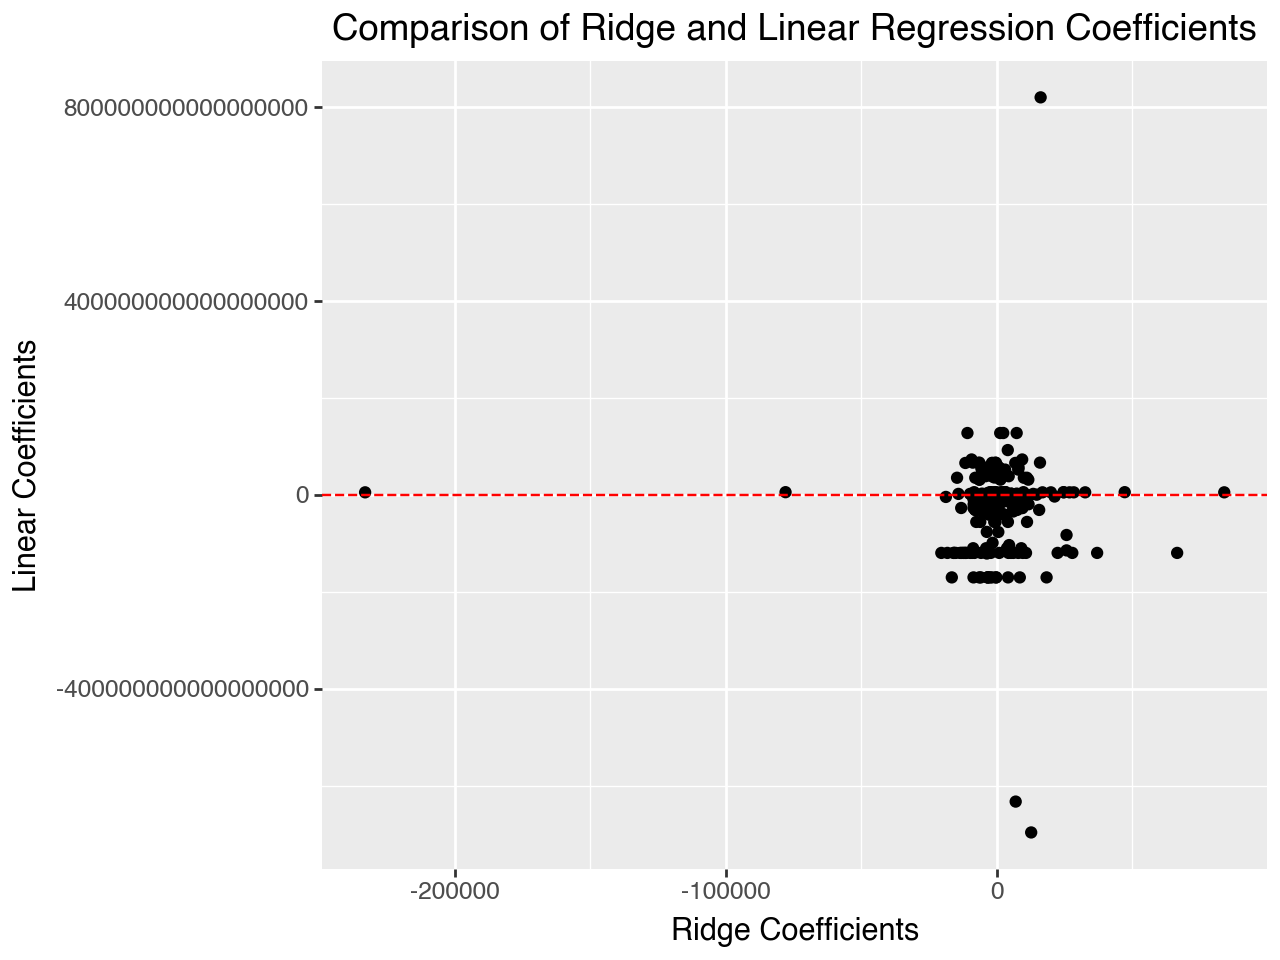

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


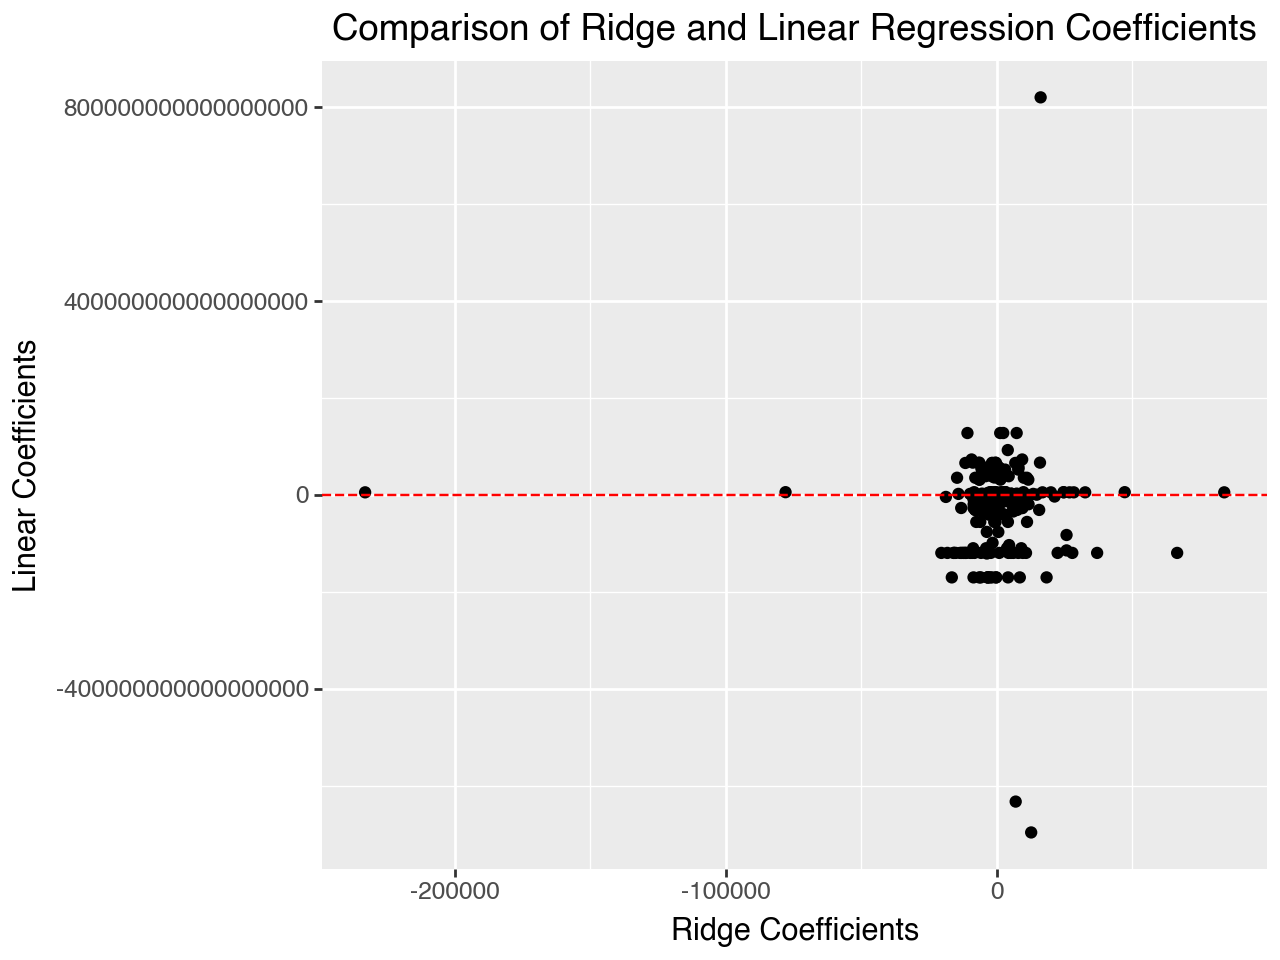

In [16]:
plot = (
    ggplot(df, aes(x='Ridge', y='los')) +
    geom_point() +
    geom_abline(slope=1, intercept=0, color='red', linetype='dashed') +
    labs(
        title="Comparison of Ridge and Linear Regression Coefficients",
        x="Ridge Coefficients",
        y="Linear Coefficients"
    )
)

print(plot)

The ridge reresion shows lower values of MSE for the models fitted.

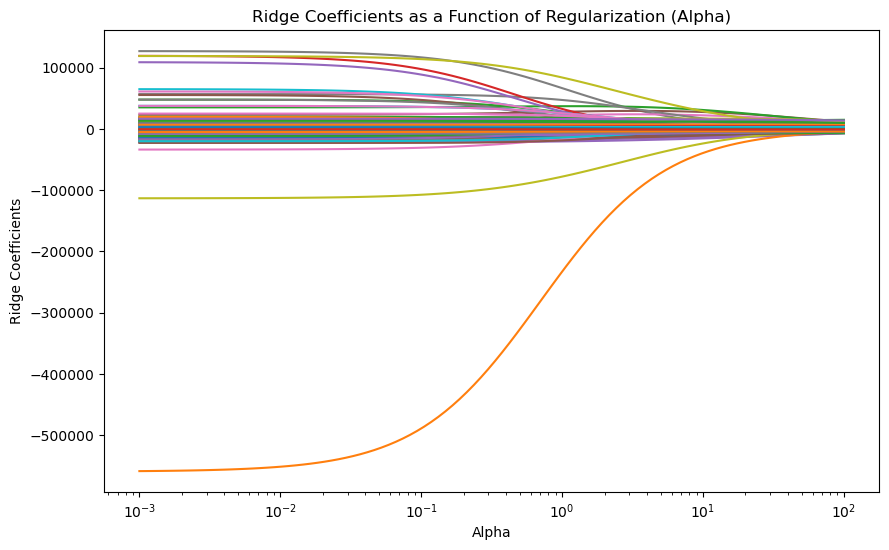

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


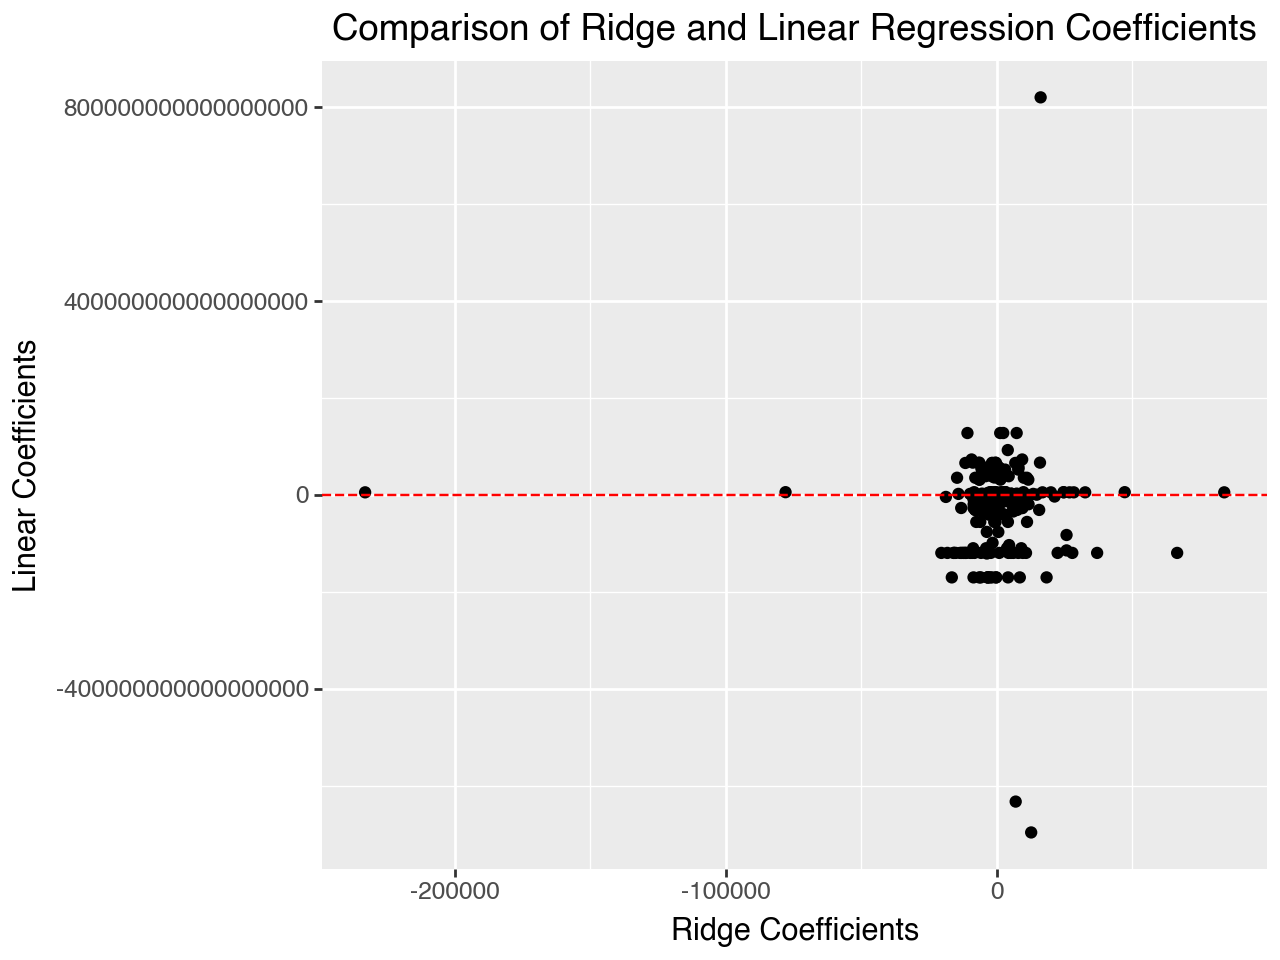

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# List of alpha values on a logarithmic scale
alphas = np.logspace(-3, 2, 100)  # from 0.001 to 100

ridge_coefs = []

for alpha in alphas:
    ridge_pipeline.set_params(ridge_regression__alpha=alpha)
    ridge_pipeline.fit(X, y)
    ridge_coefs.append(ridge_pipeline.named_steps["ridge_regression"].coef_)

# Convert list to array for easier plotting
ridge_coefs = np.array(ridge_coefs)

# Plotting the coefficients across different alphas
plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Ridge Coefficients')
plt.title('Ridge Coefficients as a Function of Regularization (Alpha)')
plt.show()


Chat GPT helped with this part to show how the ridge coefficients changed across different alpha levels.As the alpha increases the coefficients are closer to zero.

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.110e+11, tolerance: 1.348e+09


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.466e+11, tolerance: 1.474e+09


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.988e+11, tolerance: 1.463e+09


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.757e+11, tolerance: 1.407e+09


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.456e+11, tolerance: 1.477e+09


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.236e+11, tolerance: 1.348e+09


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.570e+11, tolerance: 1.474e+09


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.588e+11, tolerance: 1.463e+09


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.698e+11, tolerance: 1.407e+09


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.557e+11, tolerance: 1.477e+09


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.323e+10, tolerance: 1.477e+09


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lasso_regression__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.961184,0.093294,0.012987,0.005259,0.01,{'lasso_regression__alpha': 0.01},-7.885959e+08,-5.055637e+08,-1.221825e+09,-1.545230e+09,-5.257282e+08,-9.173885e+08,4.065590e+08,5
1,0.731392,0.118797,0.013447,0.002441,0.1,{'lasso_regression__alpha': 0.1},-7.881923e+08,-5.052834e+08,-1.192081e+09,-1.545152e+09,-5.265207e+08,-9.114459e+08,4.021607e+08,4
2,0.598479,0.096918,0.006757,0.002185,1,{'lasso_regression__alpha': 1},-7.844667e+08,-5.025365e+08,-1.186430e+09,-1.543847e+09,-5.235216e+08,-9.081603e+08,4.023206e+08,3
3,0.309601,0.156746,0.011615,0.004451,10,{'lasso_regression__alpha': 10},-7.612077e+08,-4.792376e+08,-1.160131e+09,-1.527524e+09,-5.048793e+08,-8.865960e+08,4.032322e+08,2
4,0.232899,0.029444,0.009948,0.002524,100,{'lasso_regression__alpha': 100},-7.533482e+08,-4.263880e+08,-1.136937e+09,-1.480770e+09,-4.475923e+08,-8.490071e+08,4.076566e+08,1


/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


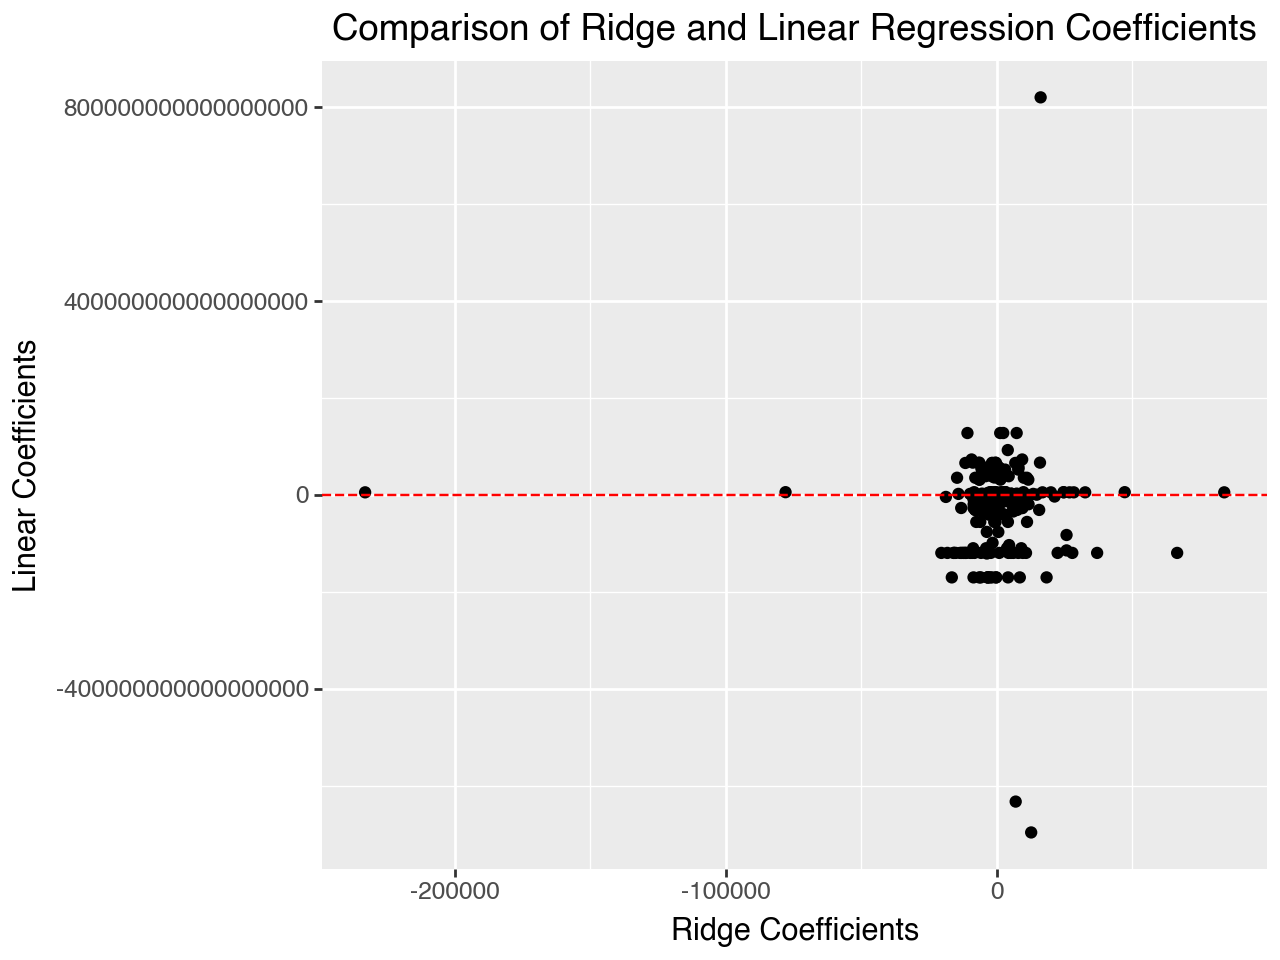

In [20]:
lasso_pipeline = Pipeline(
    [
        ("preprocessing", ct),
        ("lasso_regression", Lasso())
    ]
)

param_grid = {
    "lasso_regression__alpha": [0.01, 0.1, 1, 10, 100]
}

grid_search_lasso = GridSearchCV(
    estimator=lasso_pipeline,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=5,
    verbose=1
)

grid_search_lasso.fit(X, y)

pd.DataFrame(grid_search_lasso.cv_results_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


    mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0        0.153842      0.046362  ...    4.355485e+08                5
1        0.120747      0.028284  ...    4.335994e+08                4
2        0.136675      0.021886  ...    4.296539e+08                3
3        0.146579      0.028743  ...    4.215825e+08                2
4        0.288988      0.022220  ...    4.027261e+08                1
5        0.039030      0.002420  ...    4.088482e+08               10
6        0.041392      0.005045  ...    4.134758e+08                9
7        0.052745      0.006567  ...    4.205216e+08                8
8        0.056906      0.007251  ...    4.299375e+08                7
9        0.071639      0.005978  ...    4.360969e+08                6
10       0.030903      0.007802  ...    5.744849e+08               15
11       0.026382      0.003741  ...    5.345333e+08               14
12       0.029856      0.007915  ...    4.861783e+08               13
13       0.029658   

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


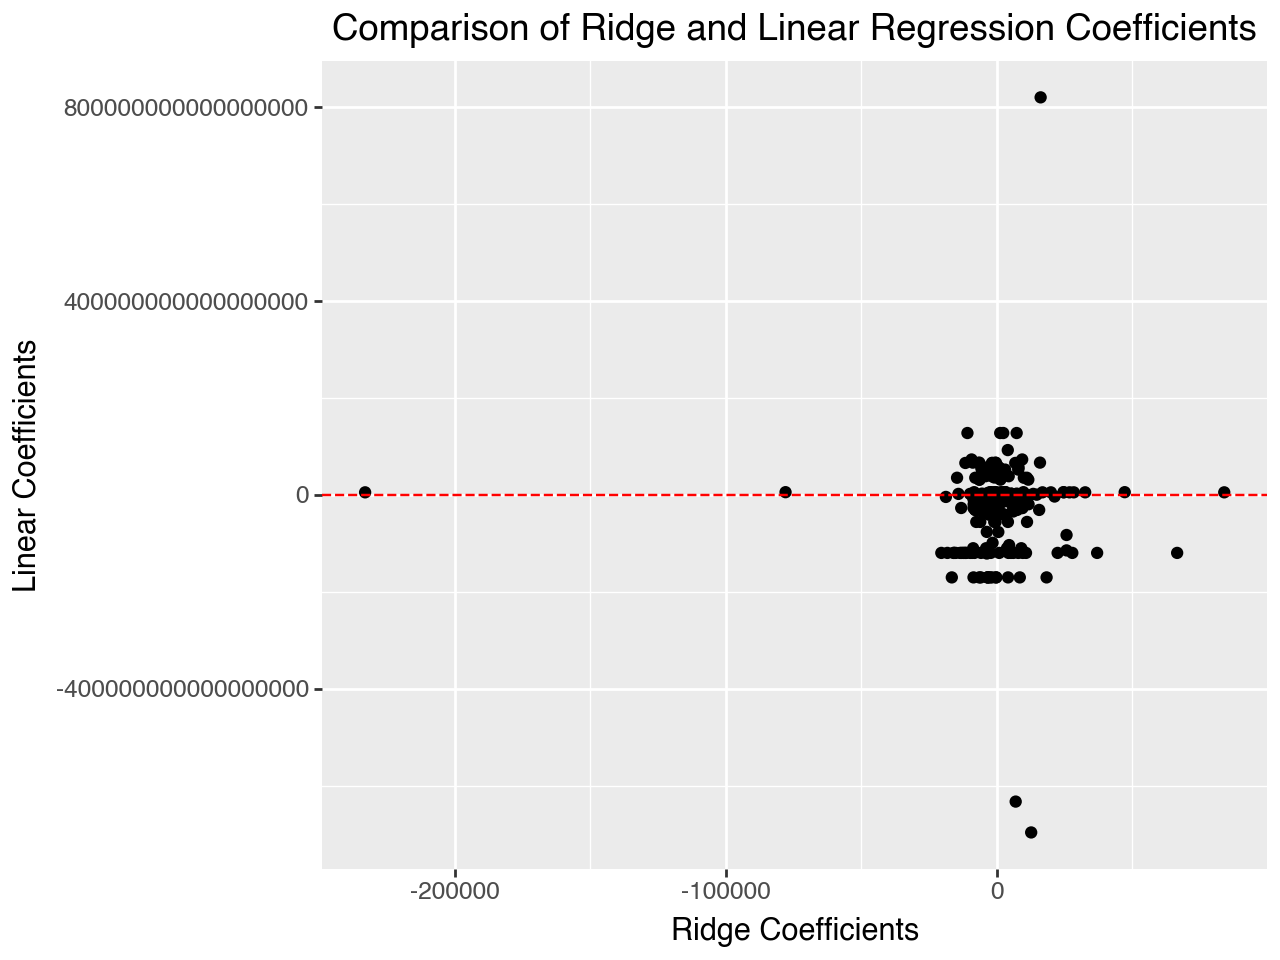

In [22]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import pandas as pd

elastic_pipeline = Pipeline(
    [
        ("preprocessing", ct),  
        ("elastic_net", ElasticNet(alpha=0.001, l1_ratio=1))  
    ]
)

# Step 2: Define the parameter grid for tuning alpha and l1_ratio
parameters = {
    "elastic_net__alpha": [0.1, 1, 10, 100],           
    "elastic_net__l1_ratio": [0.1, 0.3, 0.5, 0.7, 0.9]  
}

# Step 3: Set up GridSearchCV for hyperparameter tuning
grid_search_elastic_net = GridSearchCV(
    estimator=elastic_pipeline, 
    param_grid=parameters,       
    scoring="neg_mean_squared_error",  
    cv=5,                        
    verbose=1                    
)

grid_search_elastic_net.fit(X, y)

results_df = pd.DataFrame(grid_search_elastic_net.cv_results_)

print(results_df)

best_params = grid_search_elastic_net.best_params_
best_score = grid_search_elastic_net.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score}")
